In [130]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt


In [131]:
time_resolution = "1week"

data_path = '../network_data'+str(time_resolution)+'/'

c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps"+str(time_resolution)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("../result_csv/mix_overlaps"+str(time_resolution)+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [132]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [133]:
df_tech_overlaps.columns

Index(['Trafodion', 'OpenWebBeans', 'Drill', 'Jena', 'stdcxx', 'Etch',
       'Impala', 'Shindig', 'Droids', 'Sanselan',
       ...
       'Climate Model Diagnostic Analyzer', 'MetaModel', 'JuiCE', 'Concerted',
       'Nutch', 'Beam', 'Warble', 'RCF', 'Kabuki', 'Weex'],
      dtype='object', length=263)

In [134]:
df_tech_vectors = df_tech_overlaps[:104].replace(-1.0,0.0).values.T

In [135]:
df_tech_vectors.shape

(263, 104)

In [136]:
df_social_vectors = df_social_overlaps[:104].replace(-1.0,0.0).values.T

In [137]:
df_social_vectors.shape

(272, 104)

In [138]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_tech = linkage(df_tech_vectors, 'ward')

In [139]:
cluster_tech

array([[159.        , 187.        ,   0.        ,   2.        ],
       [222.        , 263.        ,   0.        ,   3.        ],
       [247.        , 264.        ,   0.        ,   4.        ],
       ...,
       [516.        , 517.        ,   7.27625148, 185.        ],
       [520.        , 521.        ,   7.88235972,  78.        ],
       [522.        , 523.        ,  14.83921922, 263.        ]])

In [140]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)')
		plt.xlabel('sample index or (cluster size)')
		plt.ylabel('distance')
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='k')
	return ddata

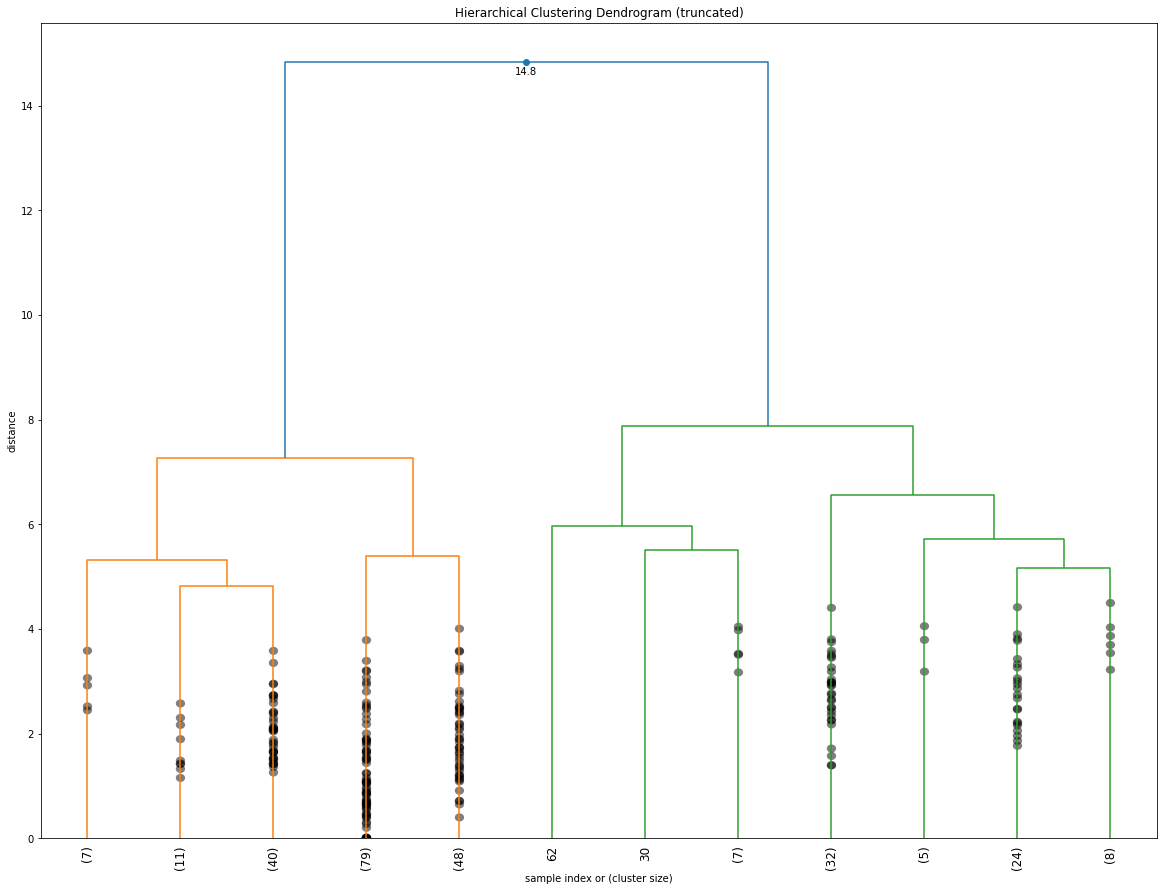

In [141]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_tech, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_tech, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [142]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_social = linkage(df_social_vectors, 'ward')

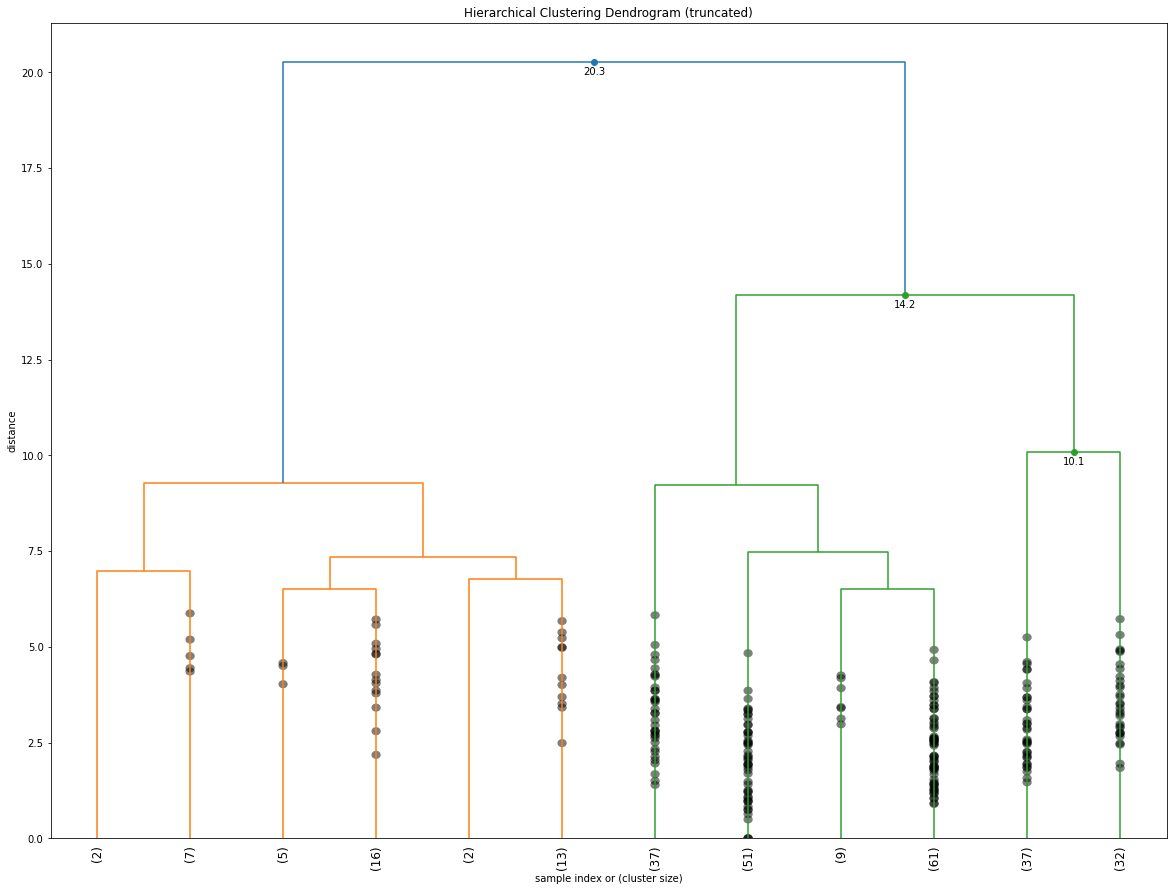

In [143]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_social, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_social, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [144]:
from scipy.cluster.hierarchy import fcluster
k = 6
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_tech = fcluster(cluster_tech, k, criterion='distance')
print(clusters_result_tech)

[2 1 2 1 3 1 2 5 4 1 4 1 4 2 5 4 5 5 1 4 1 3 1 1 1 2 2 2 4 5 3 2 1 2 5 2 5
 4 2 2 1 2 4 4 4 2 1 1 4 2 2 4 1 2 5 2 4 5 2 3 1 2 3 2 1 4 2 2 2 5 2 2 2 2
 1 2 4 4 5 1 2 1 1 2 2 1 5 1 4 4 5 5 3 2 2 4 2 2 2 2 4 1 5 5 5 5 1 4 2 2 4
 4 1 1 5 2 5 2 5 2 4 1 1 2 5 2 5 2 2 3 4 1 2 4 4 2 1 5 2 5 5 5 1 1 3 1 5 4
 5 3 5 4 1 4 2 2 2 5 2 2 5 2 1 2 2 2 2 1 1 1 2 2 5 1 1 2 4 5 1 2 5 2 2 2 2
 1 1 2 2 2 2 2 2 2 1 2 2 2 2 4 2 2 2 2 5 1 2 1 5 2 2 1 2 2 1 2 2 2 2 1 1 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2]


In [145]:
from scipy.cluster.hierarchy import fcluster
k = 8
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_social = fcluster(cluster_social, k, criterion='distance')
print(clusters_result_social)

[3 6 5 3 3 1 5 4 3 3 4 4 3 3 4 2 5 2 4 3 5 4 2 4 2 3 4 6 6 6 4 4 5 4 4 4 5
 6 6 4 5 3 2 2 4 4 2 4 5 4 4 2 5 2 2 2 4 4 2 5 1 4 3 2 3 4 3 2 5 4 4 2 3 3
 3 4 2 3 4 3 1 4 4 3 2 6 4 5 6 4 4 2 4 2 3 4 3 4 5 4 5 4 4 3 6 3 3 1 2 5 4
 4 5 3 5 5 6 3 4 4 4 4 4 2 5 2 4 4 4 4 6 2 1 4 3 3 3 4 2 3 6 4 4 4 6 2 6 5
 2 4 4 4 2 2 6 4 5 4 6 2 6 6 3 4 4 4 5 4 3 5 6 4 4 6 4 4 2 2 6 5 2 6 2 4 6
 1 6 4 6 1 2 1 4 3 3 1 4 4 4 2 5 4 4 4 6 6 4 5 4 5 4 5 4 6 4 6 5 4 4 2 4 4
 4 5 4 4 3 4 3 4 4 4 6 5 4 4 4 4 5 4 5 6 3 5 4 4 6 5 4 4 4 5 4 4 4 4 4 4 4
 4 5 4 4 4 4 4 4 4 4 4 4 4]


In [146]:
df_tech_results = pd.DataFrame(np.c_[df_tech_vectors,clusters_result_tech])
df_tech_results.index = df_tech_overlaps.columns
df_tech_results = df_tech_results.rename(columns={104:'cluster'})

In [147]:
df_tech_results

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,cluster
Trafodion,0.0,0.000000,0.400000,0.000000,0.000000,0.121212,0.000000,0.000000,0.000000,0.000000,...,0.272727,0.051282,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
OpenWebBeans,0.0,0.000000,0.000000,0.377358,0.311111,0.311111,0.385714,0.330579,0.150000,0.625000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Drill,0.0,0.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
Jena,0.0,0.000000,0.000000,0.000000,0.000000,0.352941,0.487179,0.111111,0.222222,0.485294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
stdcxx,0.0,0.333333,0.666667,0.333333,0.500000,0.666667,0.666667,0.400000,0.333333,0.000000,...,0.000000,0.050000,0.185185,0.037037,0.266667,0.266667,0.111111,0.666667,0.083333,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beam,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
Warble,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
RCF,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
Kabuki,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0


In [148]:
df_tech_plot = pd.DataFrame

In [149]:
df_tech_plot = df_tech_results.groupby('cluster').agg('median')

In [150]:
df_tech_plot

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.060247,0.143895,0.000000,0.090231,0.116883,0.000000,0.108747,0.236111,0.206667,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2.0,0.0,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3.0,0.0,0.333333,0.019231,0.200000,0.166667,0.333333,0.277778,0.285714,0.333333,0.200000,...,0.171429,0.0,0.166667,0.214286,0.037037,0.5,0.0,0.166667,0.392857,0.333333
4.0,0.0,0.021277,0.070933,0.058464,0.090909,0.103329,0.171131,0.070833,0.131027,0.147186,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
5.0,0.0,0.000000,0.200000,0.250000,0.400000,0.368852,0.339623,0.400000,0.375000,0.250000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


<AxesSubplot:>

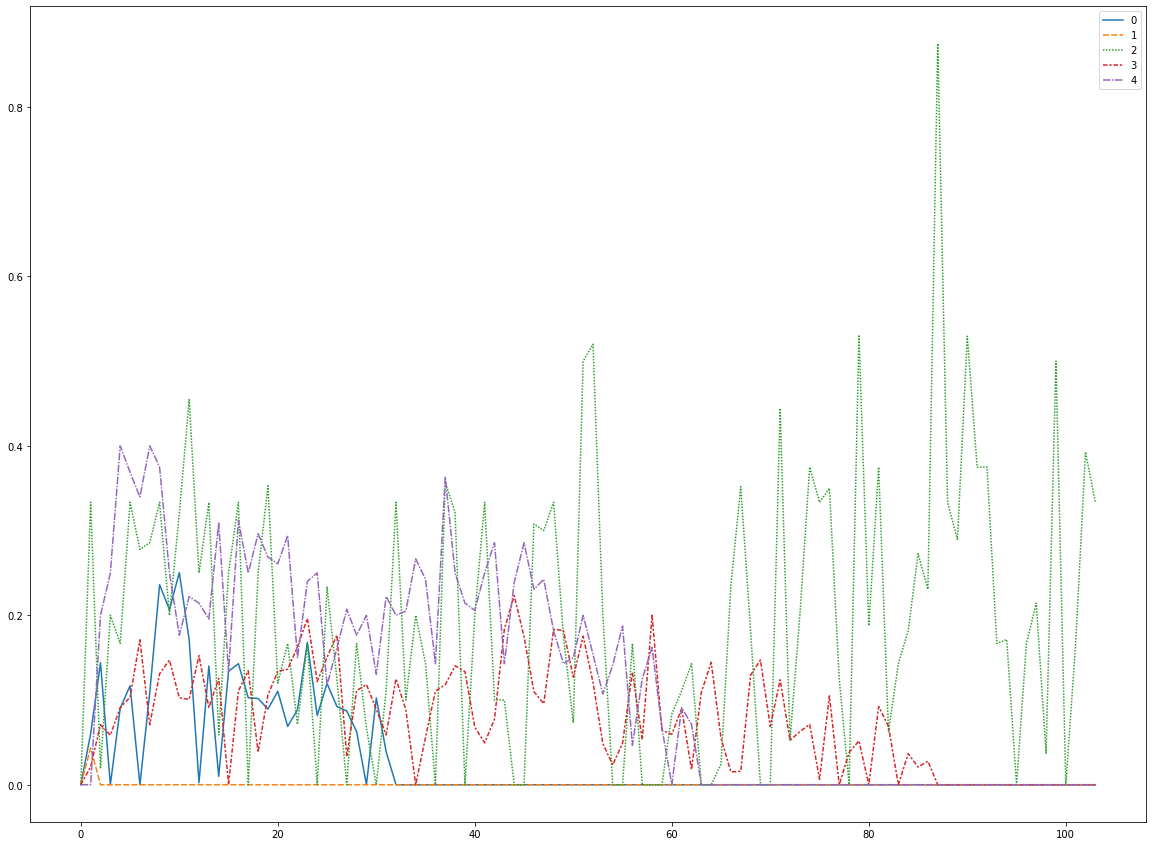

In [151]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_tech_plot.values.T)

In [152]:
df_social_results = pd.DataFrame(np.c_[df_social_vectors,clusters_result_social])
df_social_results.index = df_social_overlaps.columns
df_social_results = df_social_results.rename(columns={104:'cluster'})
df_social_plot = df_social_results.groupby('cluster').agg('median')

<AxesSubplot:>

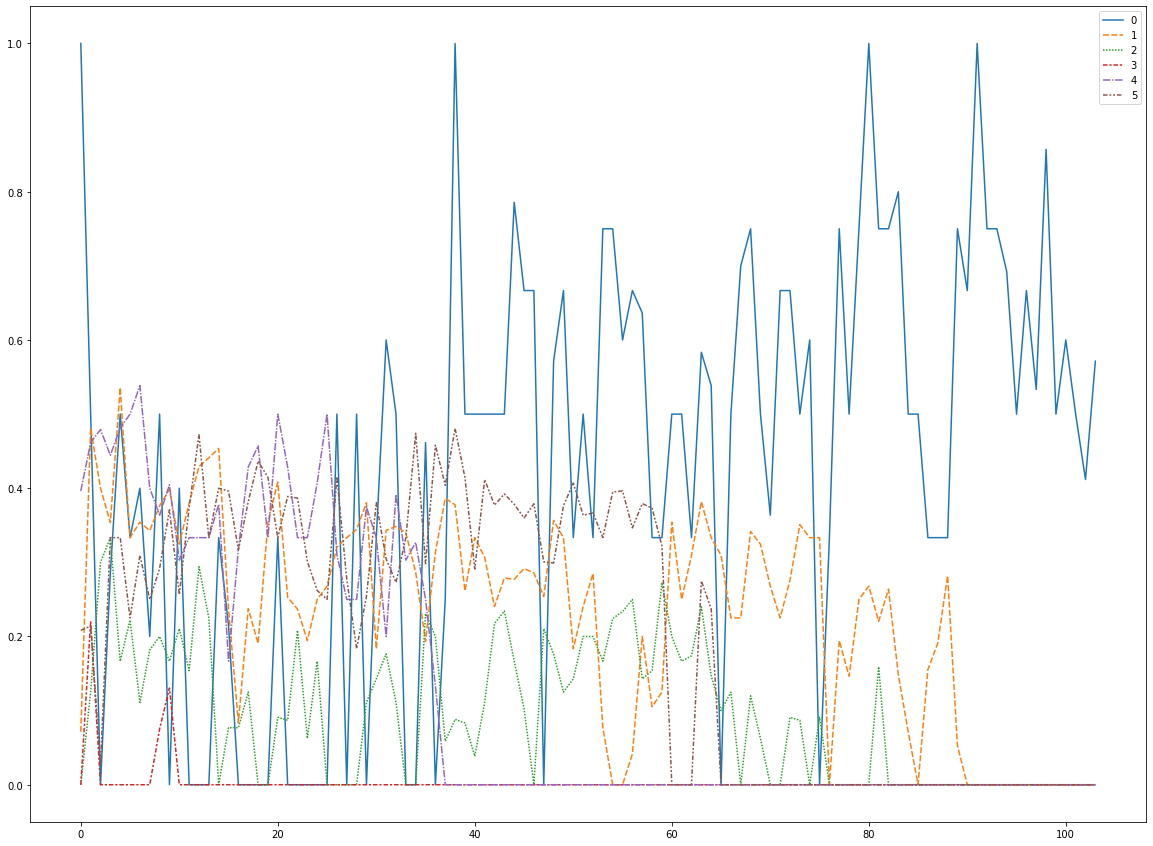

In [153]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_social_plot.values.T)